In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Load the dataset

songs_data = pd.read_csv("../data/songs_data.csv")

In [3]:
songs_data.head ()

,track_id,track_name,track_artist,track_popularity,playlist_name,playlist_id,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


# 1.0 Basic Information of the data


In [4]:
list(songs_data.columns)

['track_id',
 'track_name',
 'track_artist',
 'track_popularity',
 'playlist_name',
 'playlist_id',
 'genre',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms']

In [5]:
songs_data.shape

(32833, 19)

In [6]:
type(songs_data)

pandas.core.frame.DataFrame

In [7]:
#identify all the features that need encoding
list(songs_data.select_dtypes('object').columns)

['track_id',
 'track_name',
 'track_artist',
 'playlist_name',
 'playlist_id',
 'genre']

In [8]:
#identify all the features that need encoding
list(songs_data.select_dtypes('float64').columns)

['danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo']

In [9]:
#identify all the features that need encoding
list(songs_data.select_dtypes('int64').columns)

['track_popularity', 'key', 'mode', 'duration_ms']

In [10]:
songs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          32833 non-null  object 
 1   track_name        32828 non-null  object 
 2   track_artist      32828 non-null  object 
 3   track_popularity  32833 non-null  int64  
 4   playlist_name     32833 non-null  object 
 5   playlist_id       32833 non-null  object 
 6   genre             32833 non-null  object 
 7   danceability      32833 non-null  float64
 8   energy            32833 non-null  float64
 9   key               32833 non-null  int64  
 10  loudness          32833 non-null  float64
 11  mode              32833 non-null  int64  
 12  speechiness       32833 non-null  float64
 13  acousticness      32833 non-null  float64
 14  instrumentalness  32833 non-null  float64
 15  liveness          32833 non-null  float64
 16  valence           32833 non-null  float6

In [11]:
#the categories of track_id
songs_data.track_id.value_counts()

track_id
7BKLCZ1jbUBVqRi2FVlTVw    10
14sOS5L36385FJ3OL8hew4     9
3eekarcy7kvN4yt5ZFzltW     9
2Fxmhks0bxGSBdJ92vM42m     8
2tnVG71enUj33Ic2nFN6kZ     8
                          ..
3AKwyujeGxTQSZNbx9Ka3c     1
3ITvHA9zhZZdBJsOsAUegF     1
5gsW8TMmNVnevjq13h0Nlp     1
4pN4icvWINm9uN3bElfbec     1
29zWqhca3zt5NsckZqDf6c     1
Name: count, Length: 28356, dtype: int64

In [12]:
#the categories of track_name
songs_data.track_name.value_counts()

track_name
Poison                    22
Breathe                   21
Alive                     20
Forever                   20
Stay                      19
                          ..
Quien Eres Tu              1
Como Nadie                 1
Ya No Estás Aquí           1
Ojala                      1
Typhoon - Original Mix     1
Name: count, Length: 23449, dtype: int64

In [13]:
#the categories of track_artist
songs_data.track_artist.value_counts()

track_artist
Martin Garrix       161
Queen               136
The Chainsmokers    123
David Guetta        110
Don Omar            102
                   ... 
Underworld            1
The Witches           1
Tess Parks            1
Mick Harvey           1
Mat Zo                1
Name: count, Length: 10692, dtype: int64

In [14]:
#the categories of track_popularity
songs_data.track_popularity.value_counts()

track_popularity
0      2703
1       575
57      541
60      514
51      514
       ... 
97       22
95       15
96        7
99        4
100       2
Name: count, Length: 101, dtype: int64

In [15]:
#the categories of track_popularity
songs_data.track_popularity.value_counts()

track_popularity
0      2703
1       575
57      541
60      514
51      514
       ... 
97       22
95       15
96        7
99        4
100       2
Name: count, Length: 101, dtype: int64

In [16]:
#the categories of playlist_name
songs_data.playlist_name.value_counts()

playlist_name
Indie Poptimism                                              308
2020 Hits & 2019  Hits – Top Global Tracks 🔥🔥🔥               247
Permanent Wave                                               244
Hard Rock Workout                                            219
Ultimate Indie Presents... Best Indie Tracks of the 2010s    198
                                                            ... 
CSR 103:9 (GTA: SA)                                            7
Big White Room-Jessie-J                                        7
TOP 50 GLOBAL 2020 UPDATED WEEKLY 🌍🎶 WORLDWIDE                 6
ALPAS Music Festival                                           3
Post-Teen Pop                                                  1
Name: count, Length: 449, dtype: int64

In [17]:
#the categories of playlist_id
songs_data.playlist_id.value_counts()

playlist_id
4JkkvMpVl4lSioqQjeAL0q    247
37i9dQZF1DWTHM4kX49UKs    198
6KnQDwp0syvhfHOR4lWP7x    195
3xMQTDLOIGvj3lWH5e5x6F    189
3Ho3iO0iJykgEQNbjB2sic    182
                         ... 
4sr2xEhXQR5VuZ0LZX8TQ8      7
6dqoVI7qwYLyNqbg0MPad3      7
2CJsD3fcYJWcliEKnwmovU      6
6pPpLz42hUkr8gbMirkAEl      3
6HprqD6WZMx5peClrxaprN      1
Name: count, Length: 471, dtype: int64

# 2.0 Basic Feature comparison

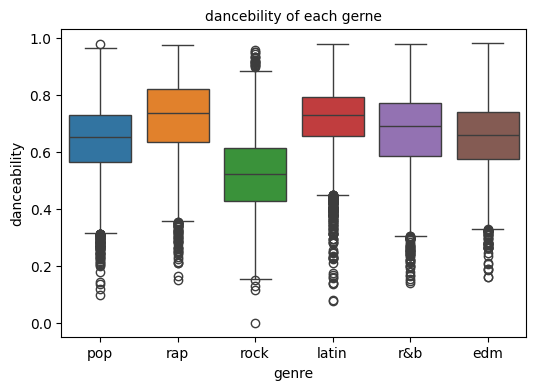

In [18]:
# distribution of dancebility
plt.rcParams["figure.figsize"] = (6,4)

sns.boxplot(y=songs_data.danceability, x=songs_data.genre, hue=songs_data.genre)
plt.title("dancebility of each gerne", size=10);

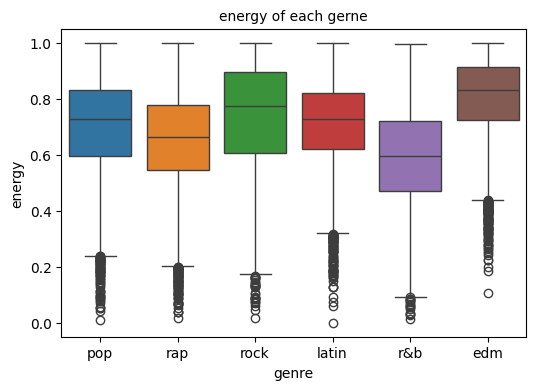

In [19]:
# distribution of energy 
plt.rcParams["figure.figsize"] = (6,4)

sns.boxplot(y=songs_data.energy, x=songs_data.genre, hue=songs_data.genre)
plt.title("energy of each gerne", size=10);

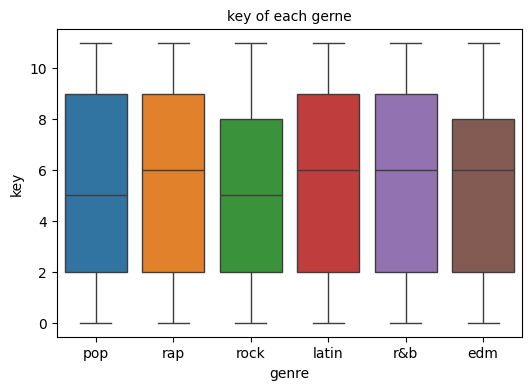

In [75]:
# distribution of key
plt.rcParams["figure.figsize"] = (6,4)

sns.boxplot(y=songs_data.key, x=songs_data.genre, hue=songs_data.genre)
plt.title("key of each gerne", size=10);

### Note: Drop the value of key, because they show no siginificant differences between the genres for the prediction model.

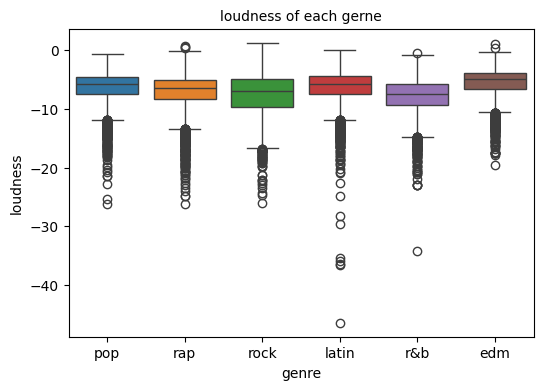

In [21]:
# distribution of loudness
plt.rcParams["figure.figsize"] = (6,4)

sns.boxplot(y=songs_data.loudness, x=songs_data.genre, hue=songs_data.genre)
plt.title("loudness of each gerne", size=10);

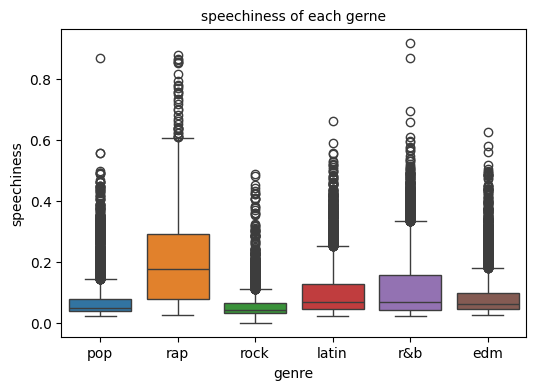

In [22]:
# distribution of speechiness
plt.rcParams["figure.figsize"] = (6,4)

sns.boxplot(y=songs_data.speechiness, x=songs_data.genre, hue=songs_data.genre)
plt.title("speechiness of each gerne", size=10);

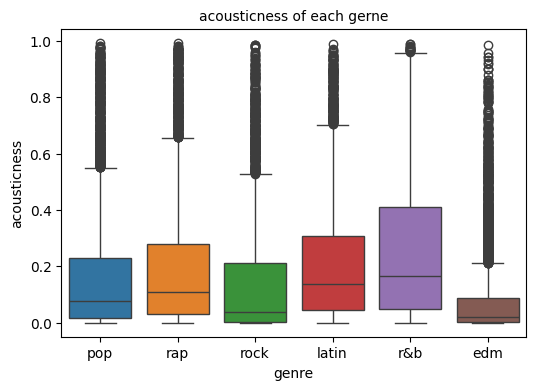

In [23]:
# distribution of acousticness
plt.rcParams["figure.figsize"] = (6,4)

sns.boxplot(y=songs_data.acousticness, x=songs_data.genre, hue=songs_data.genre)
plt.title("acousticness of each gerne", size=10);

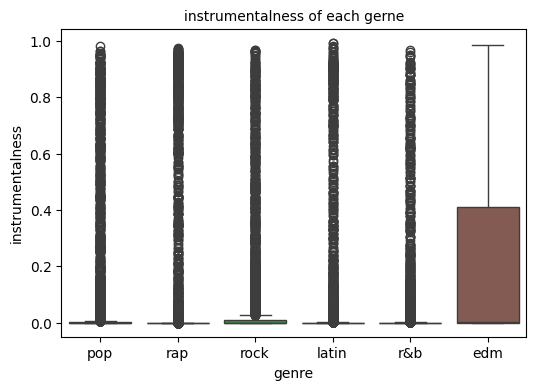

In [24]:
# distribution of instrumentalness
plt.rcParams["figure.figsize"] = (6,4)

sns.boxplot(y=songs_data.instrumentalness, x=songs_data.genre, hue=songs_data.genre)
plt.title("instrumentalness of each gerne", size=10);

### Note: Drop the value of instrumentalness, because they show no siginificant differences among the genres for the prediction model, except for edm, which doesn't influence the prediction model a lot.

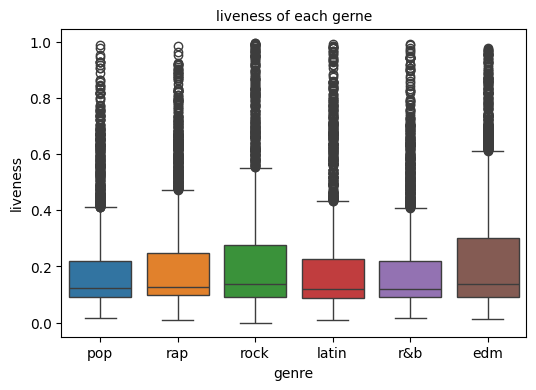

In [25]:
# distribution of liveness
plt.rcParams["figure.figsize"] = (6,4)

sns.boxplot(y=songs_data.liveness, x=songs_data.genre, hue=songs_data.genre)
plt.title("liveness of each gerne", size=10);

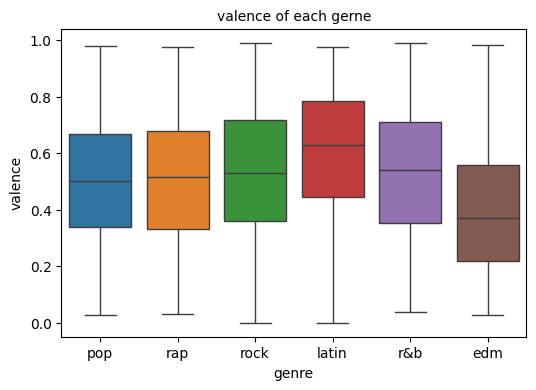

In [26]:
# distribution of valence 
plt.rcParams["figure.figsize"] = (6,4)

sns.boxplot(y=songs_data.valence, x=songs_data.genre, hue=songs_data.genre)
plt.title("valence of each gerne", size=10);

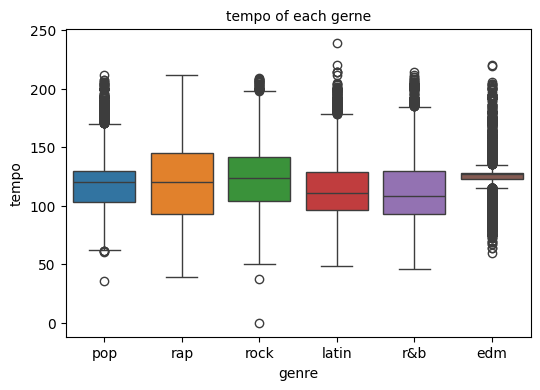

In [27]:
# distribution of tempo
plt.rcParams["figure.figsize"] = (6,4)

sns.boxplot(y=songs_data.tempo, x=songs_data.genre, hue=songs_data.genre)
plt.title("tempo of each gerne", size=10);

# 3.0 Clean the data

In [28]:
# Identify duplicates based on specific columns
duplicates = songs_data.duplicated(subset=["track_name", "track_artist","playlist_name"])
print(f"Number of duplicate rows: {duplicates.sum()}")
print("Duplicate rows:\n", songs_data[duplicates])
duplicates.head()

Number of duplicate rows: 658
Duplicate rows:
                      track_id  \
510    2V65y3PX4DkRhy1djlxd9p   
527    2AVredtzre1KADDXWoGd4I   
1348   4VginDwYTP2eaHJzO0QMjG   
1349   421leiR6jKlH5KDdwLYrOs   
1358   4evmHXcjt3bTUHD1cvny97   
...                       ...   
31121  5fp6j7TdmXpmKM6QEDL6ZA   
31122  1CuBioSnK1CMLeKDmNpoix   
31482  4gjrsP1Tmrqh1IiHhMXQm5   
31536  1dssHOp3HpaK9o5c0CL7xU   
31863  7LzahanKFAWdfrqKEjiUli   

                                              track_name         track_artist  \
510                   Don't You Worry Child - Radio Edit  Swedish House Mafia   
527                                      Like I Love You     Lost Frequencies   
1348                                             Circles          Post Malone   
1349                                        Dance Monkey          Tones and I   
1358                     Beautiful People (feat. Khalid)           Ed Sheeran   
...                                                  ...              

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [29]:
clean_songs_data = songs_data.drop_duplicates(subset=["track_name", "track_artist","playlist_name"]) 
print(clean_songs_data)

# save the data
clean_songs_data.to_csv("../data/clean_songs_data.csv", index=False)

                     track_id  \
0      6f807x0ima9a1j3VPbc7VN   
1      0r7CVbZTWZgbTCYdfa2P31   
2      1z1Hg7Vb0AhHDiEmnDE79l   
3      75FpbthrwQmzHlBJLuGdC7   
4      1e8PAfcKUYoKkxPhrHqw4x   
...                       ...   
32828  7bxnKAamR3snQ1VGLuVfC1   
32829  5Aevni09Em4575077nkWHz   
32830  7ImMqPP3Q1yfUHvsdn7wEo   
32831  2m69mhnfQ1Oq6lGtXuYhgX   
32832  29zWqhca3zt5NsckZqDf6c   

                                              track_name      track_artist  \
0      I Don't Care (with Justin Bieber) - Loud Luxur...        Ed Sheeran   
1                        Memories - Dillon Francis Remix          Maroon 5   
2                        All the Time - Don Diablo Remix      Zara Larsson   
3                      Call You Mine - Keanu Silva Remix  The Chainsmokers   
4                Someone You Loved - Future Humans Remix     Lewis Capaldi   
...                                                  ...               ...   
32828               City Of Lights - Official Radio Edit 

In [30]:
# Drop unnecessary columns
columns_to_drop = [
    'track_name', 'track_artist', 'track_popularity', 
    'playlist_name', 'playlist_id', 'key', 'instrumentalness'
]
df_cleaned = clean_songs_data.drop(columns=columns_to_drop)
df_cleaned.to_csv("../data/df_cleaned.csv", index=False)

In [31]:
df_cleaned.head()

,track_id,genre,danceability,energy,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,pop,0.748,0.916,-2.634,1,0.0583,0.1020,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,pop,0.726,0.815,-4.969,1,0.0373,0.0724,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,pop,0.675,0.931,-3.432,0,0.0742,0.0794,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,pop,0.718,0.930,-3.778,1,0.1020,0.0287,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,pop,0.650,0.833,-4.672,1,0.0359,0.0803,0.0833,0.725,123.976,189052


# 4.0 Data Classification

In [32]:
# This section encodes the 'genre' column into numerical values using LabelEncoder
label_encoder = LabelEncoder()
df_cleaned['genre_encoded'] = label_encoder.fit_transform(df_cleaned['genre'])

In [33]:
# Drop the original 'genre' column
df_encoded = df_cleaned.drop(columns=['genre'])

In [34]:
df_encoded.head()

,track_id,danceability,energy,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_ms,genre_encoded
0,6f807x0ima9a1j3VPbc7VN,0.748,0.916,-2.634,1,0.0583,0.1020,0.0653,0.518,122.036,194754,2
1,0r7CVbZTWZgbTCYdfa2P31,0.726,0.815,-4.969,1,0.0373,0.0724,0.3570,0.693,99.972,162600,2
2,1z1Hg7Vb0AhHDiEmnDE79l,0.675,0.931,-3.432,0,0.0742,0.0794,0.1100,0.613,124.008,176616,2
3,75FpbthrwQmzHlBJLuGdC7,0.718,0.930,-3.778,1,0.1020,0.0287,0.2040,0.277,121.956,169093,2
4,1e8PAfcKUYoKkxPhrHqw4x,0.650,0.833,-4.672,1,0.0359,0.0803,0.0833,0.725,123.976,189052,2


## Note: 
### Encoded: 0. edm, 1. Latin, 2. pop, 3. R&B, 4. rap, 5. rock 

In [35]:
# save the data
df_encoded.to_csv("../data/df_encoded.csv", index=False)

In [36]:
# Define features and target variable
X = df_encoded.drop(columns=['track_id', 'genre_encoded'])
y = df_encoded['genre_encoded']

In [37]:
# Split the data into training and testing sets 80/20 subsets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
# Initialize and train the Random Forest classifier
# This section initializes the Random Forest model and trains it on the training data
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [39]:
# Predict on the test set
# This section uses the trained model to make predictions on the test data
y_pred = rf_classifier.predict(X_test)

In [40]:
# Evaluate the model's performance
# This section calculates and prints the accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_)


In [41]:
print(f"Model Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)

Model Accuracy: 0.5639471639471639
Classification Report:
               precision    recall  f1-score   support

         edm       0.66      0.68      0.67      1160
       latin       0.54      0.44      0.48      1001
         pop       0.38      0.34      0.36      1075
         r&b       0.49      0.48      0.48      1037
         rap       0.60      0.68      0.63      1180
        rock       0.66      0.76      0.71       982

    accuracy                           0.56      6435
   macro avg       0.55      0.56      0.56      6435
weighted avg       0.56      0.56      0.56      6435



In [42]:
# importing the algorithm
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier()

In [43]:
# training your machine learning model

clf_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [44]:
# predict the labels for the test set

y_pred_dt = clf_tree.predict(X_test)
y_pred_dt

array([1, 5, 2, ..., 3, 3, 1])

In [45]:
y_test

11167    4
3919     2
15879    5
11577    5
21691    3
        ..
17748    1
15624    5
22455    3
9711     4
24698    3
Name: genre_encoded, Length: 6435, dtype: int64

In [46]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_dt)

0.4354312354312354

In [47]:
from sklearn.metrics import recall_score

# Use one of the following depending on your requirement
recall = recall_score(y_test, y_pred_dt, average='micro')   # or 'macro', 'weighted'
print(recall)

0.4354312354312354


In [48]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred_dt, average='micro')

0.4354312354312354

In [49]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred_dt,average='micro')

0.4354312354312354

In [50]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.53      0.56      0.54      1160
           1       0.37      0.42      0.39      1001
           2       0.28      0.27      0.27      1075
           3       0.37      0.38      0.37      1037
           4       0.49      0.44      0.46      1180
           5       0.58      0.55      0.56       982

    accuracy                           0.44      6435
   macro avg       0.44      0.43      0.44      6435
weighted avg       0.44      0.44      0.44      6435



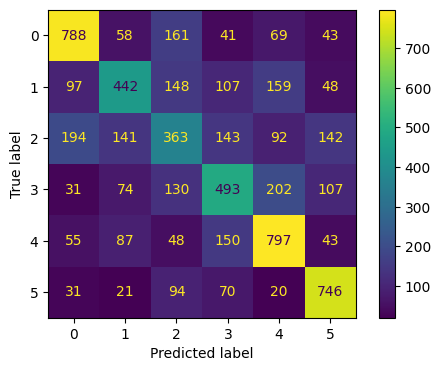

In [72]:
# Note: Encoded: 0. edm, 1. Latin, 2. pop, 3. R&B, 4. rap, 5. rock 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# plot confusion matrix

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf_tree.classes_)

disp.plot();

### Summary： The predictions of edm, rap and rock are more accurate, but those of latin, pop and R&B are less accurate and overlap genres due to similar attributes in the music style.

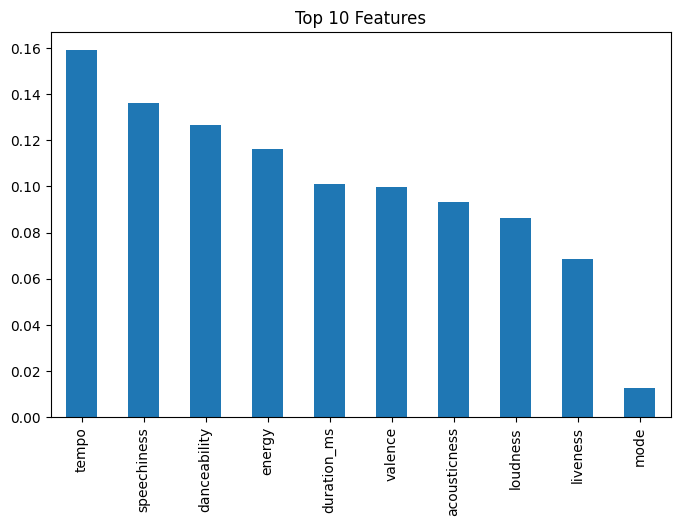

In [52]:
# Plot the feature importance

import matplotlib.pyplot as plt

def feature_importance_plot(model, X_train, n):
    """Plots feature importance - this only works for Random Forest and XGBoost Models

    @param model - the trained model
    @param X_train dataframe - the training dataset
    @param n int - the number of features we are interested in plotting
    
    @return a plot with the Top n features
    """
    
    plt.figure(figsize=(8, 5)) # set figure size
    feat_importances = pd.Series(model.feature_importances_,
                                 index = X_train.columns)
    feat_importances.nlargest(n).plot(kind = 'bar')
    plt.title(f"Top {n} Features")
    plt.show()


feature_importance_plot(clf_tree, X_train, n = 10)

# Random Forest

In [53]:
# importing the algorithm
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier()

In [54]:
clf_rf.fit(X_train, y_train)

RandomForestClassifier()

In [55]:
y_pred_rf = clf_rf.predict(X_test)

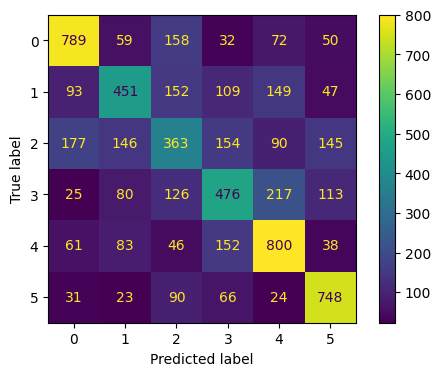

In [56]:
# Note: Encoded: 0. edm, 1. Latin, 2. pop, 3. R&B, 4. rap, 5. rock 
# plot confusion matrix

cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf_rf.classes_)

disp.plot();

In [57]:
precision_score(y_test, y_pred_rf,average='micro')

0.5636363636363636

In [58]:
accuracy_score(y_test, y_pred_rf)

0.5636363636363636

In [59]:
recall_score(y_test, y_pred_rf,average='macro')

0.561181595397016

In [60]:

f1_score(y_test, y_pred_rf,average='macro')

0.5554322183001563

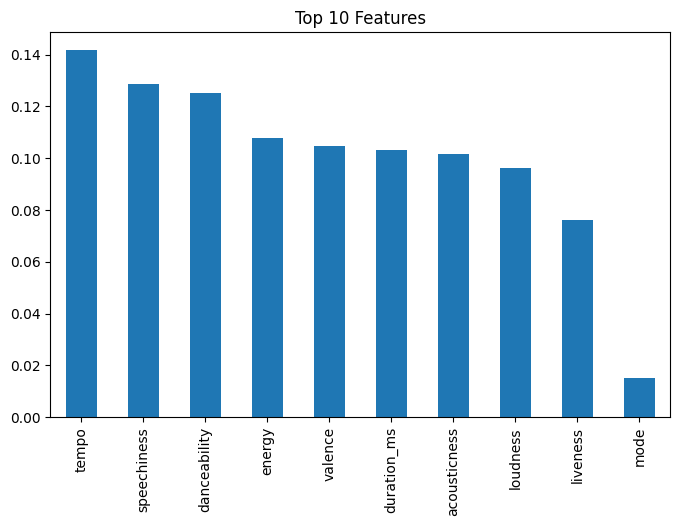

In [61]:
feature_importance_plot(clf_rf, X_train, n = 10)

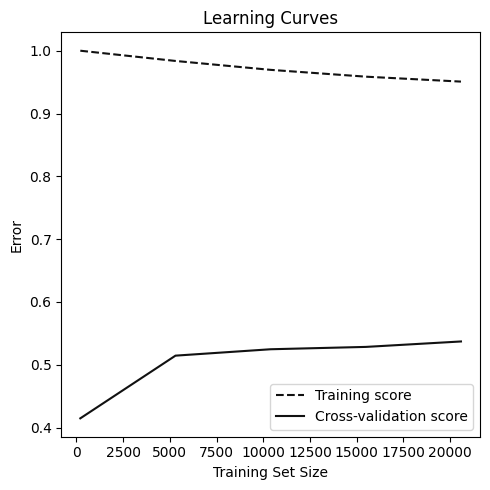

In [62]:
from learning_curve_plot import learning_curve_plot

learning_curve_plot(clf_rf, X_train, y_train, scoring = 'accuracy')

# XGBoost

In [63]:
# import the xgboost
from xgboost import XGBClassifier

clf_xgb = XGBClassifier()

In [64]:
clf_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [65]:
y_pred_xgb = clf_xgb.predict(X_test)

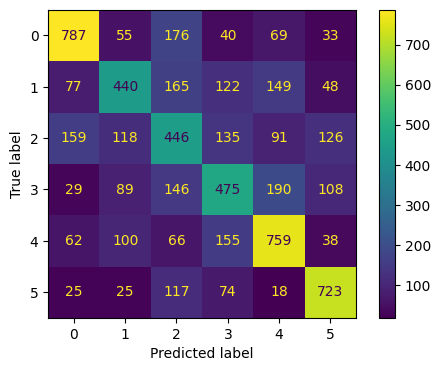

In [66]:
# Note: Encoded: 0. edm, 1. Latin, 2. pop, 3. R&B, 4. rap, 5. rock 
# plot confusion matrix

cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf_xgb.classes_)

disp.plot();

In [67]:
precision_score(y_test, y_pred_xgb,average='micro')

0.5641025641025641

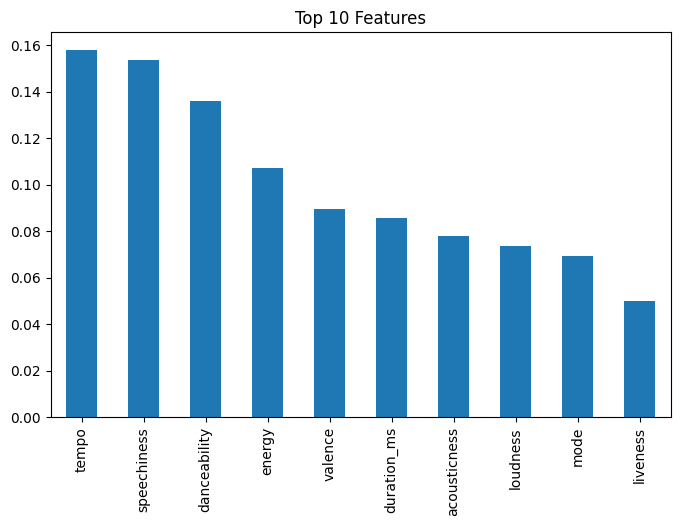

In [68]:
feature_importance_plot(clf_xgb, X_train, n = 10)

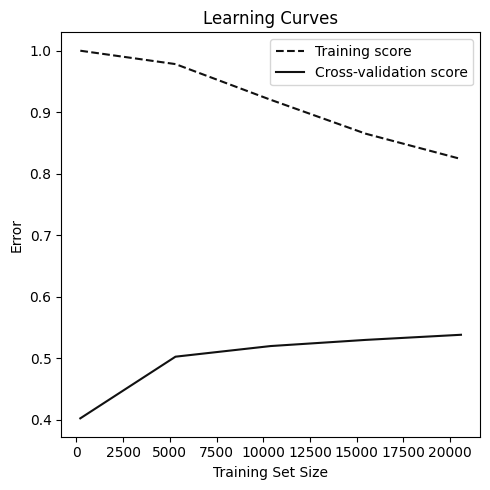

In [69]:
learning_curve_plot(clf_xgb, X_train, y_train, scoring = 'accuracy')

# Summary

In [85]:
# This code is just for demonstration, and to compare the metrics of the models

pd.DataFrame({"Model Name": ['Random Forest', 'XGBoost'],
              "Accuracy": [
                           #round(accuracy_score(y_test, y_pred_dt), 2),
                           round(accuracy_score(y_test, y_pred_rf), 2),
                           round(accuracy_score(y_test, y_pred_xgb), 2)
                          ],
              "Recall": [ 
                        #round(recall_score(y_test, y_pred_dt,average='macro'), 2),
                        round(recall_score(y_test, y_pred_rf,average='macro'), 2),
                        round(recall_score(y_test, y_pred_xgb,average='macro'), 2)],
              "Precision": [
                           #round(precision_score(y_test, y_pred_dt,average='micro'), 2),
                           round(precision_score(y_test, y_pred_rf,average='micro'), 2),
                           round(precision_score(y_test, y_pred_xgb,average='micro'), 2)],
              "F1-Score": [ 
                           #round(f1_score(y_test, y_pred_dt,average='macro'), 2),
                           round(f1_score(y_test, y_pred_rf,average='macro'), 2),
                           round(f1_score(y_test, y_pred_xgb,average='macro'), 2)],
             })

# Question - which Model has a highest accuracy, recall, precision and f1-score?

,Model Name,Accuracy,Recall,Precision,F1-Score
0,Random Forest,0.56,0.56,0.56,0.56
1,XGBoost,0.56,0.56,0.56,0.56


## Evaluation: 
### 1.The prediction of three gernes(edm, rap and rock) are accurate and the other(latin, pop and R&B) are less. That is why the generally prediction model only scores above 50%.
### 2.The feature valence of latin and the accousticness of R&B are more significant, maybe we can implement these features to improve the accuracy(but we haven't done it).